In [1]:
from octis.dataset.dataset import Dataset
import hdbscan
import sys
sys.path.append('C:\\Users\\Martin\\Documents\\GitHub\\master\\evaluation')
import trainer
import helper
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
import multimodal
import c_tf_idf
import multimodalModel

In [4]:
output_folder = './results/experiment_1'
dataset_folder = './multimodal_custom_octis_dataset/'

In [5]:
mm_dataset = Dataset()
mm_dataset.load_custom_dataset_from_folder(dataset_folder)

In [6]:
embedding_model = SentenceTransformer("clip-ViT-B-32")

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [7]:

path_to_data = './multimodal_data.tsv'

try:
    texts, images = multimodal.get_image_and_text_from_file(path_to_data)
except FileNotFoundError:
    base_path = '..\\data\\processed'
    ends = ['processed_part-00000-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00001-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00002-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00003-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00004-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,]
    paths = [f'{base_path}\\{end}' for end in ends]
    df = helper.load_all_data(paths)
    df.to_csv(path_to_data, index=False, sep='\t')
    texts, images = helper.get_image_and_text_from_df(df)


In [8]:
text_embed = multimodal.get_embeddings_from_text(texts, embedding_model)
image_embed = multimodal.get_embeddings_from_images(images, embedding_model)

 37%|███▋      | 34/91 [00:34<00:54,  1.05it/s]c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 91/91 [01:31<00:00,  1.01s/it]


In [9]:
metricsloader = trainer.MetricsLoader(dataset_folder)

In [10]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':text_embed,
'precomputed_image_embeds':image_embed
}
base_name = 'experiment_1_mm_'

min_cluster_sizes = [100, 200, 400]

get_extra_info = True
fitted_clusterers = []
image_representatives = []
top_terms_representatives = []
for min_cluster_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    params['clusterer']=clusterer

    mm_trainer = trainer.Trainer(custom_dataset_folder=dataset_folder, params=params, metrics_loader=metricsloader)
    helper.run_experiment(mm_trainer, output_folder, name=f'{base_name}unrestricted_topics_min_cluster_size_{min_cluster_size}', num_times=10)
    if get_extra_info:
        last_fit_clusterer = mm_trainer.model.clusterer
        fitted_clusterers.append(last_fit_clusterer)

        mm_trainer.model.find_image_representatives()
        last_fit_images = mm_trainer.model.cluster_images
        last_fit_terms = mm_trainer.model.top_terms

        image_representatives.append(last_fit_images)
        top_terms_representatives.append(last_fit_terms)

start:24032023_14_29_30


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 131500.67it/s]


diversity:0.7909090909090909
wetc:0.6794774756785663


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 216457.28it/s]


diversity:0.75
wetc:0.6154092024666141


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 202555.83it/s]


diversity:0.79
wetc:0.6450912618313902


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 217420.17it/s]


diversity:0.8
wetc:0.6610933701439262


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 221845.29it/s]


diversity:0.7545454545454545
wetc:0.6609991359746584


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 223374.08it/s]


diversity:0.78
wetc:0.6793367657451748


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 93715.53it/s]


diversity:0.81
wetc:0.6403081813026501


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 159865.64it/s]


diversity:0.79
wetc:0.6769995983791711


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 218388.65it/s]


diversity:0.8
wetc:0.687625663513533


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 208165.84it/s]


diversity:0.7888888888888889
wetc:0.6834589757358875
end:24032023_15_41_14
start:24032023_15_41_16


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 189609.48it/s]


diversity:0.8333333333333334
wetc:0.6576869462700244


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 223373.84it/s]


diversity:0.8428571428571429
wetc:0.7331903647437955


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 148238.89it/s]


diversity:0.8285714285714286
wetc:0.6632360083004075


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 106577.43it/s]


diversity:0.775
wetc:0.6458625982680584


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 226477.27it/s]


diversity:0.7625
wetc:0.6711044581256049


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 243380.16it/s]


diversity:0.8
wetc:0.5962734783189021


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 225435.40it/s]


diversity:0.75
wetc:0.6429694151655083


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 235188.37it/s]


diversity:0.8142857142857143
wetc:0.6757748073728005


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 202145.74it/s]


diversity:0.88
wetc:0.6988812445727055


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 213619.78it/s]


diversity:0.775
wetc:0.7030424557345089
end:24032023_17_13_11
start:24032023_17_13_12


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 219315.61it/s]


diversity:0.825
wetc:0.6366573320994579


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 216454.77it/s]


diversity:0.725
wetc:0.6168039981141328


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 183217.58it/s]


diversity:0.7428571428571429
wetc:0.5999769380607088


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 162522.05it/s]


diversity:0.8166666666666667
wetc:0.6994006806168226


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 154318.65it/s]


diversity:0.8833333333333333
wetc:0.649597942586663


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 151390.57it/s]


diversity:0.8333333333333334
wetc:0.6719265053354359


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 119606.52it/s]


diversity:0.6714285714285714
wetc:0.609743005444796


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 165540.77it/s]


diversity:0.8
wetc:0.6043650486478498


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 169269.60it/s]


diversity:0.9
wetc:0.6512922848487529


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 200486.76it/s]


diversity:0.84
wetc:0.5660731995522204
end:24032023_19_00_47


<AxesSubplot:ylabel='$\\lambda$ value'>

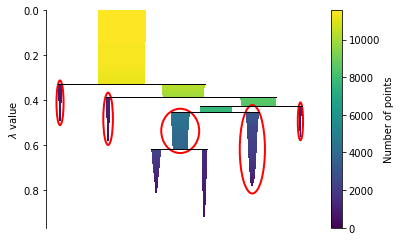

In [11]:
fitted_clusterers[2].condensed_tree_.plot(select_clusters=True)

In [12]:
image_representatives

[{0: <PIL.Image.Image image mode=RGB size=200x200 at 0x12F7F4247F0>,
  1: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA3CC5AC0>,
  2: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA3CB3970>,
  3: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA3CB38E0>,
  4: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA3F970D0>,
  5: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA3CB3910>,
  6: <PIL.Image.Image image mode=RGB size=200x200 at 0x12F7F424460>,
  7: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA426BBB0>,
  8: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA3F971F0>},
 {0: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FA408BA90>,
  1: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FE461C220>,
  2: <PIL.Image.Image image mode=RGB size=200x200 at 0x12F8F62ECD0>,
  3: <PIL.Image.Image image mode=RGB size=200x200 at 0x12FE3F7F7F0>,
  4: <PIL.Image.Image image mode=RGB size=200x200 at 0x12DF861CC70>,
  5: <PIL.Image.Image image mode=

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



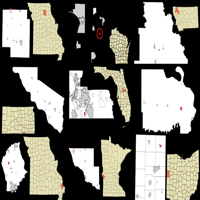
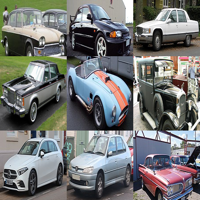
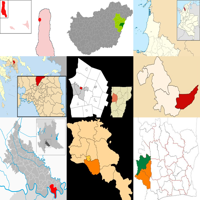
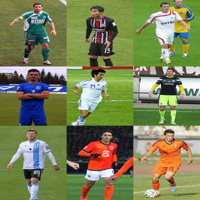
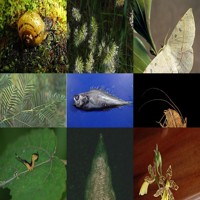
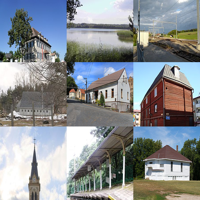
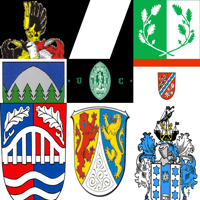
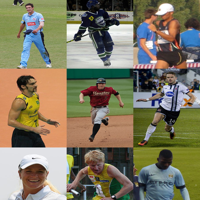
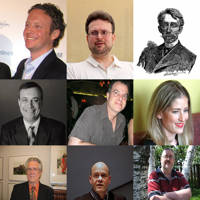


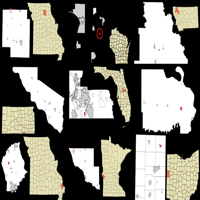
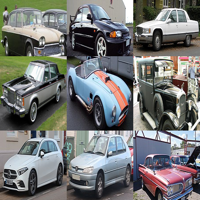
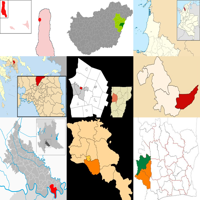
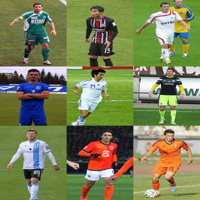
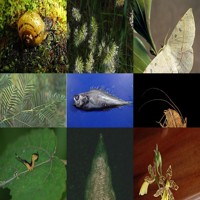
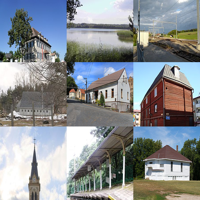
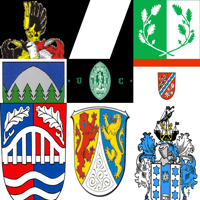
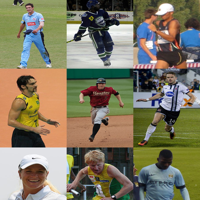
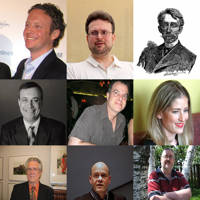


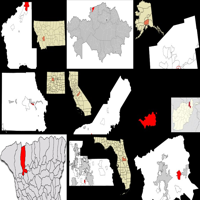
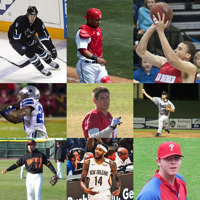
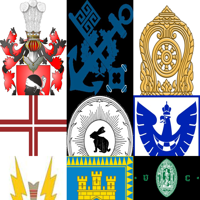
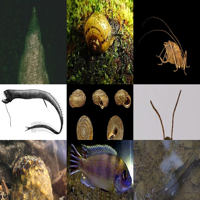
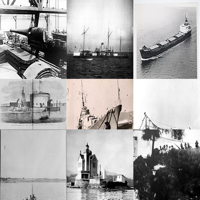
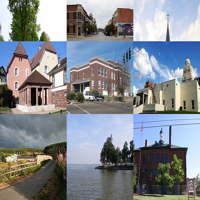
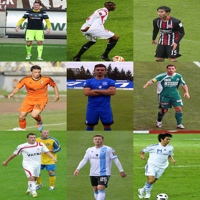
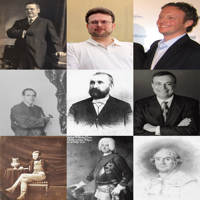


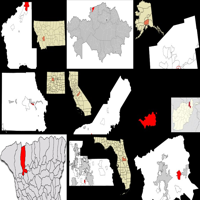
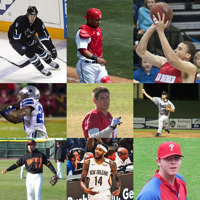
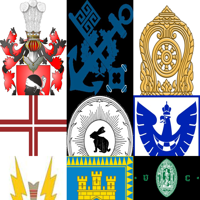
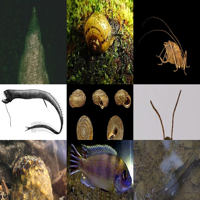
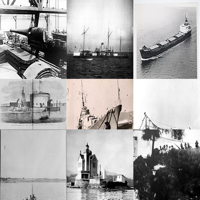
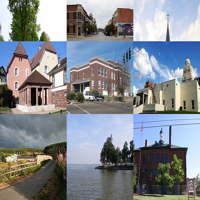
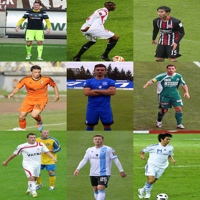
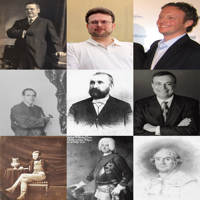


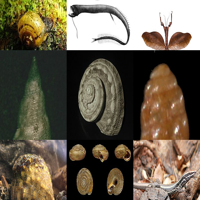
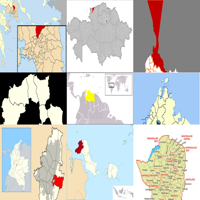
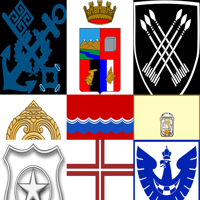
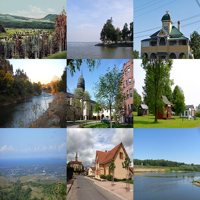
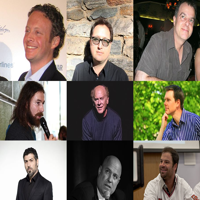


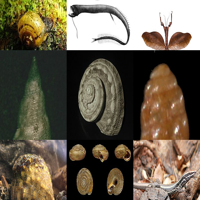
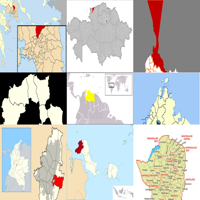
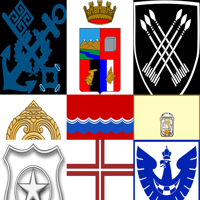
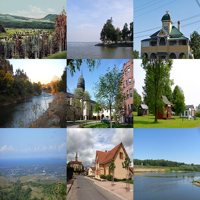
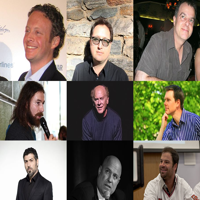

In [13]:
import ipyplot
for nr in [0,1,2]:
    ipyplot.plot_images([*image_representatives[nr].values()],custom_texts=top_terms_representatives[nr], max_images=20, img_width=150)
    

In [14]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':text_embed,
'precomputed_image_embeds':image_embed,
'n_clusters':10
}
clusterer = hdbscan.HDBSCAN(min_cluster_size=200)
params['clusterer']=clusterer
mm_trainer = trainer.Trainer(custom_dataset_folder=dataset_folder, params=params, metrics_loader=metricsloader)
helper.run_experiment(mm_trainer, output_folder, name=f'{base_name}restricted_topics', num_times=10)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


start:24032023_19_01_01


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 8 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 177886.90it/s]


diversity:0.77
wetc:0.6830165756950943


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 9 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 202195.54it/s]


diversity:0.76
wetc:0.6826630581971964


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 6 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 165311.63it/s]


diversity:0.69
wetc:0.6531722496560228


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 8 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 195714.82it/s]


diversity:0.71
wetc:0.645010433145279


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 5 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 191124.70it/s]


diversity:0.77
wetc:0.6223278251265597


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 8 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 199697.27it/s]


diversity:0.75
wetc:0.6458752145336538


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 7 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 207311.07it/s]


diversity:0.72
wetc:0.6482496331024244


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 6 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 216477.84it/s]


diversity:0.73
wetc:0.6737298956304635


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 9 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 217440.45it/s]


diversity:0.73
wetc:0.6868762224557659


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\hdbscan\flat.py:155: UserWarning: Cannot predict more than 7 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 178549.28it/s]


diversity:0.74
wetc:0.6626361769208898
end:24032023_20_33_27
